# Kalman-Filter
Im Vorlesungsskript wird in Kapitel 4.4 der Kalman-Filter eingeführt. Eine weitere gute Quelle
ist http://www.cbcity.de/das-kalman-filter-einfach-erklaert-teil-1.

## Univariater Kalman-Filter
Zunächst soll ein einfacher Kalman-Filter für den univariaten Fall implementiert werden. Dieser soll folgendes System abbilden: Ein Fahrzeug bewegt sich mit einer konstanten Geschwindigkeit entlang einer geraden Strecke. Sie möchten eine Schätzung darüber abgeben, wie weit sich das Fahrzeug bewegt hat. Dazu stehen folgende Informationen zur Verfügung:
1. Die (konstante) Geschwindigkeit des Fahrzeugs v = 50 m/s (sie nehmen an, dass das Fahrzeug nicht genau diese Geschwindigkeit fährt, sondern dass die Geschwindigkeit in jedem Schritt normalverteilt ist mit Mittelwert v und Varianz 5).
2. Sie erhalten regelmäßig (jede Sekunde) Beobachtungen über die tatsächliche Position des Fahrzeugs (diese sind wieder normalverteilt, mit Varianz 2).

Die Schätzung möchten Sie mit einem Kalman-Filter durchführen. 
1. Warum kann hier ein Kalman-Filter verwendet werden? 
2. Bevor Sie mit der Implementierung starten, überlegen Sie sich: Was wird beim Predict-Schritt berechnet, was beim Update-Schritt? Woraus besteht der Zustand des Systems?
3. Implementieren Sie eine Funktion `observe(state,obs.variance)`, die einen Systemzustand (d.h. Mittelwert und Varianz) übergeben bekommt, und daraus eine Observation (d.h. wieder Mittelwert und Varianz) erzeugt.
4. Implementieren Sie eine Funktion `predict(state,speed,predict.variance)`, die den Predict-Schritt für einen gegebenen Systemzustand erzeugt.
5. Implementieren Sie eine Funktion `update(state,observation)`, die den Update-Schritt berechnet.
6. Implementieren Sie eine Funktion, die den Kalman-Filter N Schritte laufen lässt. Plotten Sie in jedem Schritt die Dichte-Funktion des Zustands nach dem Predict, der Observation, und des Zustands nach dem Update.

In [1]:
#here, we consider a 1-dimensional gaussian-linear dynamic system:
#a car moves. the state is the travelled distance of the car (assuming constant speed)
#we observe the travelled distance via GPS

#This code is based on
#http://www.cbcity.de/das-kalman-filter-einfach-erklaert-teil-1


#prediction, given old state and the properties of the movement (speed and variance)
predict=function(oldstate,speed=50,var=5){
  #new state: add means, add var
  oldmean=oldstate[['mean']]
  oldvar=oldstate[['var']]
  movement = list(mean=speed,var=var)
  newstate = list(mean=oldstate[['mean']]+movement[['mean']],var=oldstate[['var']]+movement[['var']])
}

#observation model: get the observation density, given a state
observation=function(state,var=2){
  #obs is normal around actual position
  obsmean = rnorm(1,state[['mean']],sd=sqrt(var))
  obs = list(mean=obsmean,var=var)
}

#update function: 
update=function(oldstate,observation){
  mean1=oldstate[['mean']]
  mean2=observation[['mean']]
  var1=oldstate[['var']]
  var2=observation[['var']]
  newmean=(var2*mean1 + var1*mean2) / (var1+var2)
  newvar = 1/(1/var1 +1/var2)
  newstate = list(mean=newmean,var=newvar)
}

#iteratively apply the kalman filter
#and save the result after each predict and update
#and plot the results
main=function(STEPS=5){
  state = list(mean=0,var=50)
  statesafterpredict = list(1:STEPS)
  statesafterupdate = list(1:STEPS)
  observations = list(1:STEPS)
  
  for(i in 1:STEPS){
    #predict step
    state = predict(state,50,5)
    statesafterpredict[[i]] = state
    #make observation
    obs = observation(state,30)
    observations[[i]]=obs
    #update step
    state = update(state,obs)
    statesafterupdate[[i]] = state
  }
  
  #plot everything (single plot for each step: after predict, observation density, after update)
  
  for(i in 1:STEPS){
    #min and max of the plot
    ma = statesafterpredict[[i]][['mean']]+30
    mi = statesafterpredict[[i]][['mean']]-30
    res=seq(mi,ma,0.1)
    plot(0,xlim=c(mi,ma),ylim=c(0,0.5),type="l",main=paste0("Time=",i))
    predictline = dnorm(res,statesafterpredict[[i]][['mean']],
                        sqrt(statesafterpredict[[i]][['var']]))
    lines(res,predictline)
    obsline = dnorm(res,observations[[i]][['mean']],
                    sqrt(observations[[i]][['var']]))
    lines(res,obsline,col="blue")
    updateline = dnorm(res,statesafterupdate[[i]][['mean']],
                       sqrt(statesafterupdate[[i]][['var']]))
    lines(res,updateline,col="red")
    readline(prompt="Press [enter] to continue")
  }
  
}

Press [enter] to continue
Press [enter] to continue


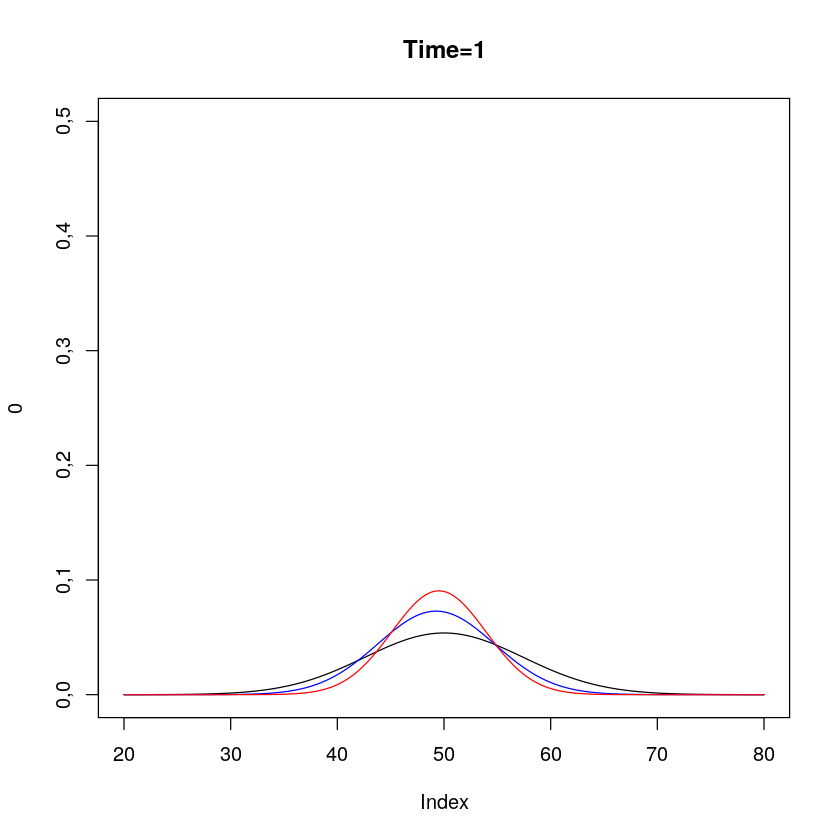

Press [enter] to continue


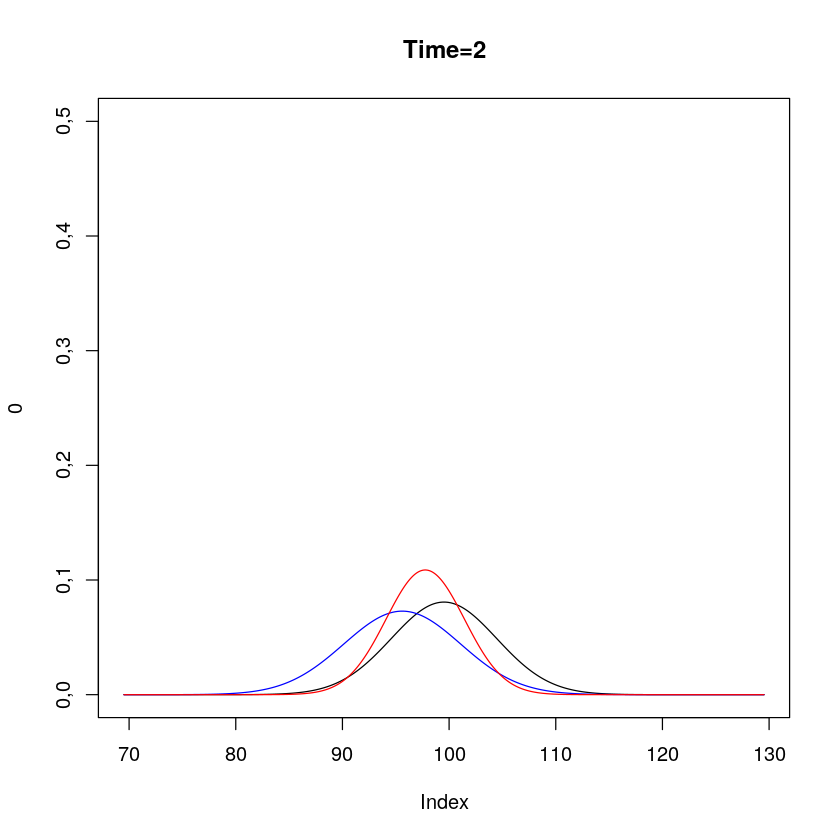

Press [enter] to continue


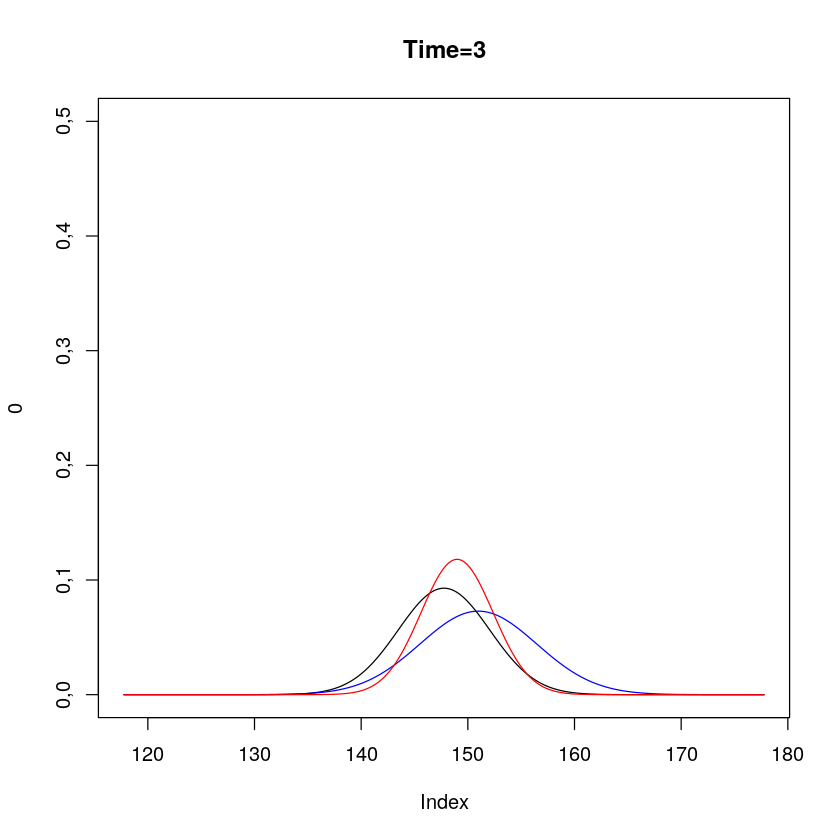

In [ ]:
main()

## Multivariater Kalman-Filter

Es soll nun nicht mehr nur die 1D-Distanz des Fahrzeugs berücksichtigt werden, sondern es soll die 2D-Position des Fahrzeugs getrackt werden. Außerdem soll die (nun nicht mehr als konstant angenommene) Geschwindigkeit des Fahrzeugs in beide Richtungen getrackt werden. Erweitern Sie Ihre Kalman-Filter-Funktion so, dass auch Multivariate Zustände und Observationen verarbeitet werden können.

1. Aus welchen Komponenten besteht der Zustand nun?
2. Erweitern Sie die `observe`-Funktion entsprechend. Gehen Sie davon aus, dass in jedem Schritt die Position direkt beobachtet wird. Wie muss die Matrix $C$ aussehen? Nehmen Sie an, dass 
$R=\begin{bmatrix}
5 & 0\\
0 & 5
\end{bmatrix}$. Was ist die Bedeutung der Matrizen $R$ und $C$?
3. Erweitern Sie die `predict`-Funktion entsprechend. Nutzen Sie $dt=1$,
\begin{equation*}
Q=\begin{bmatrix}
1/4*dt^4 & 1/4*dt^4& 1/2*dt^3& 1/2*dt^3\\
    1/4*dt^4& 1/4*dt^4& 1/2*dt^3& 1/2*dt^3\\
    1/2*dt^3& 1/2*dt^3& dt^2& dt^2\\
    1/2*dt^3& 1/2*dt^3& dt^2& dt^2
\end{bmatrix}
\end{equation*}
und 
\begin{equation*}
A = 
\begin{bmatrix}
1& 0& dt& 0\\
0 & 1 & 0 & dt\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
\end{equation*}
Was ist die Bedeutung von $Q$ und $A$?
4. Erweitern Sie die `update`-Funktion entsprechend.
5. Erweitern sie die `main`-Funktion entsprechend. Verwenden Sie $\mu_0 = [0, 0, 50, 20]$ und
$V_0 = diag(10, 10, 10, 10)$.

In [3]:
require(MASS)

#here, we consider a 4-dimensional gaussian-linear dynamic system:
#a car moves. the state is the x and y position, and the x and y speed

#For this code, we simply use the equations at ATBISSS, p. 92
#also look at ATBISSS, p. 77 for an example

#instead of a mean and variance, we now have a mean vector and a covariance matrix
#called mu and V

#elements that we need to define up-front are:
#system matrix A (formerly, the speed)

#process noise covariance Q (formerly, the variance in the predict step)

#output matrix C (describing relationship of mu and observation y)

#measurement noise covariance R (formerly, the variance in the update step)


#prediction, given old state and properties of the movement (system matrix and process covariance)
predict=function(state,A,Q){
  oldmean=state[['mean']]
  oldvar=state[['var']]
  newmean = A %*% oldmean
  newvar = (A %*% oldvar %*% t(A)) + Q
  newstate = list(mean=newmean,var=newvar)
}

#observation model: get the observation density, given a state
observation=function(state,R,C){
  #first, get the elements of the state that are acually observed
  observed = C %*% state[['mean']]
  #obs is normal around observed quantity
  obsmean = mvrnorm(1,observed,R)
  obs = list(mean=obsmean,var=R)
}

#update function: 
update=function(oldstate,observation,C){
  mu=oldstate[['mean']]
  y=observation[['mean']]
  V=oldstate[['var']]
  R=observation[['var']]
  
  z = y - C %*% mu
  S = R + (C %*% V %*% t(C))
  K = V %*% t(C) %*% solve(S)
  Vnew = V - (K %*% C %*% V)
  munew = mu + (K %*% z)
  

  newstate = list(mean=munew,var=Vnew)
}

#iteratively apply the kalman filter
#and save the result after each predict and update
#and plot the results
main=function(STEPS=5){
  #define the initial things
  #state vector consists of: x, y, x', y'
  dt=1
  mu0 = c(0,0,50,20)
  #initial covariance
  V0 = matrix(c(10,0,0,0,
                0,10,0,0,
                0,0,10,0,
                0,0,0,10),nrow=4,ncol=4,byrow=T)
  #state dynamics: in both directions: old location + 50* speed
  A = matrix(c(1,0,dt,0,
                0,1,0,dt,
                0,0,1,0,
                0,0,0,1),nrow=4,ncol=4,byrow=T)
  #what is observed: the location is observed directly
  C = matrix(c(1,0,0,0,
               0,1,0,0),nrow=2,ncol=4,byrow=T)
  #measurement noise
  R = matrix(c(5,0,
               0,5),nrow=2,ncol=2,byrow=T)
  #process noise
  Q = matrix( c(1/4*dt^4, 1/4*dt^4, 1/2*dt^3, 1/2*dt^3,
       1/4*dt^4, 1/4*dt^4, 1/2*dt^3, 1/2*dt^3,
       1/2*dt^3, 1/2*dt^3, dt^2, dt^2,
       1/2*dt^3, 1/2*dt^3, dt^2, dt^2),nrow=4,ncol=4,byrow=T)
  
  state = list(mean=mu0,var=V0)
  statesafterpredict = list(1:STEPS)
  statesafterupdate = list(1:STEPS)
  observations = list(1:STEPS)
  
  for(i in 1:STEPS){
    #predict step
    state = predict(state,A,Q)
    statesafterpredict[[i]] = state
    #make observation
    obs = observation(state,R,C)
    observations[[i]]=obs
    #update step
    state = update(state,obs,C)
    statesafterupdate[[i]] = state
  }
  
  #plot x location (single plot for each step: after predict, observation density, after update)
  el=1
  for(i in 1:STEPS){
    #min and max of the plot
    ma = statesafterpredict[[i]][['mean']][el]+30
    mi = statesafterpredict[[i]][['mean']][el]-30
    res=seq(mi,ma,0.1)
    plot(0,xlim=c(mi,ma),ylim=c(0,0.5),type="l",main=paste0("Time=",i))
    predictline = dnorm(res,statesafterpredict[[i]][['mean']][el],
                        sqrt(statesafterpredict[[i]][['var']][el,el]))
    lines(res,predictline)
    obsline = dnorm(res,observations[[i]][['mean']][el],
                    sqrt(observations[[i]][['var']][el,el]))
    lines(res,obsline,col="blue")
    updateline = dnorm(res,statesafterupdate[[i]][['mean']][el],
                       sqrt(statesafterupdate[[i]][['var']][el,el]))
    lines(res,updateline,col="red")
    readline(prompt="Press [enter] to continue")
  }
  
}

Loading required package: MASS


Press [enter] to continue
Press [enter] to continue


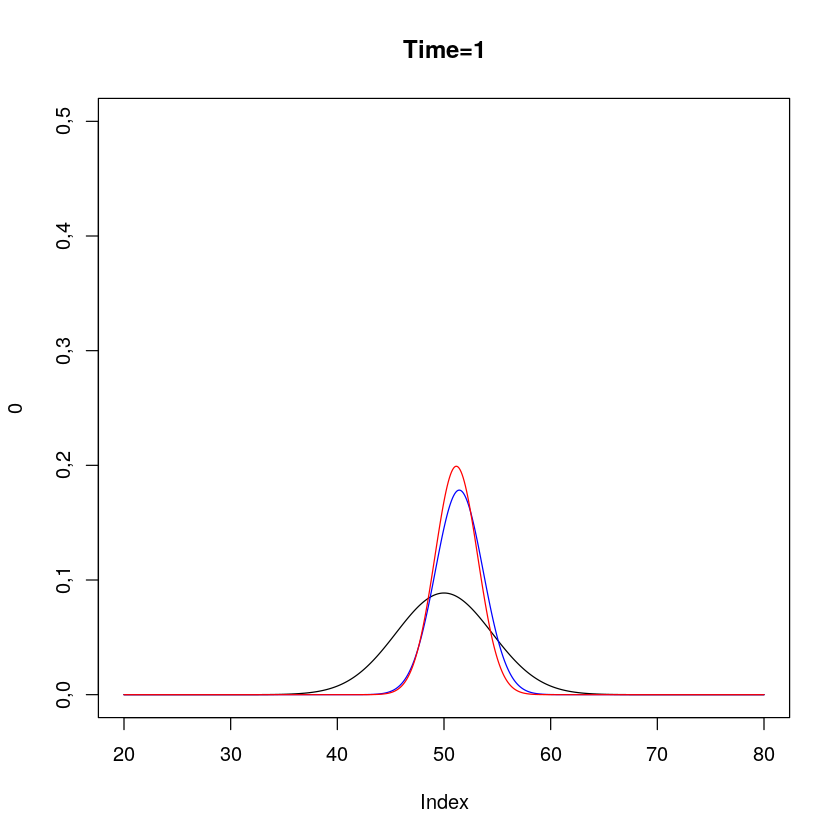

Press [enter] to continue


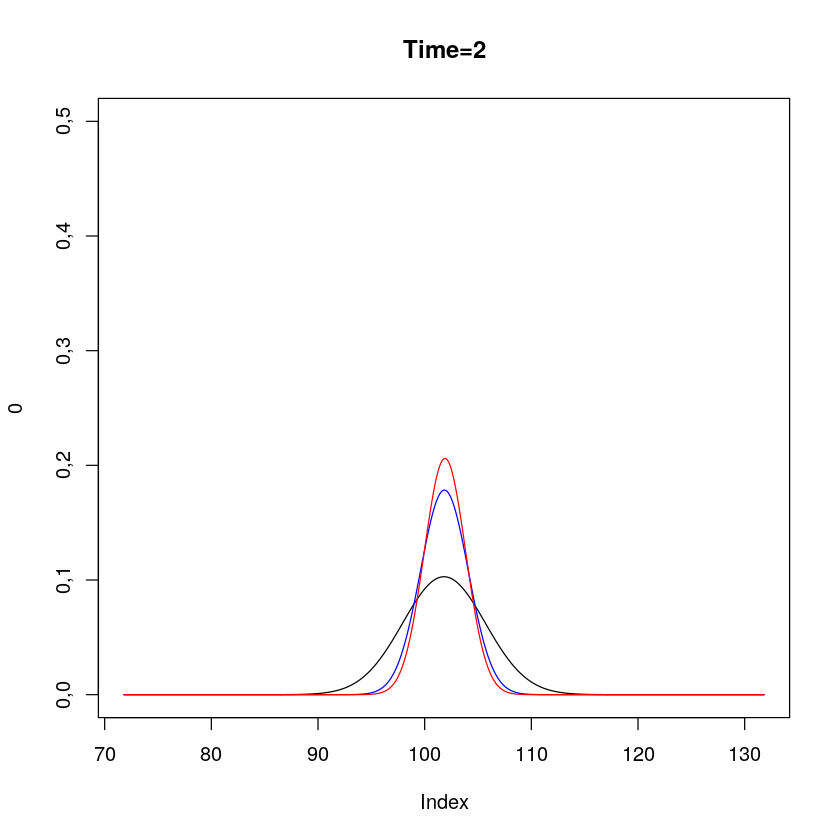

Press [enter] to continue


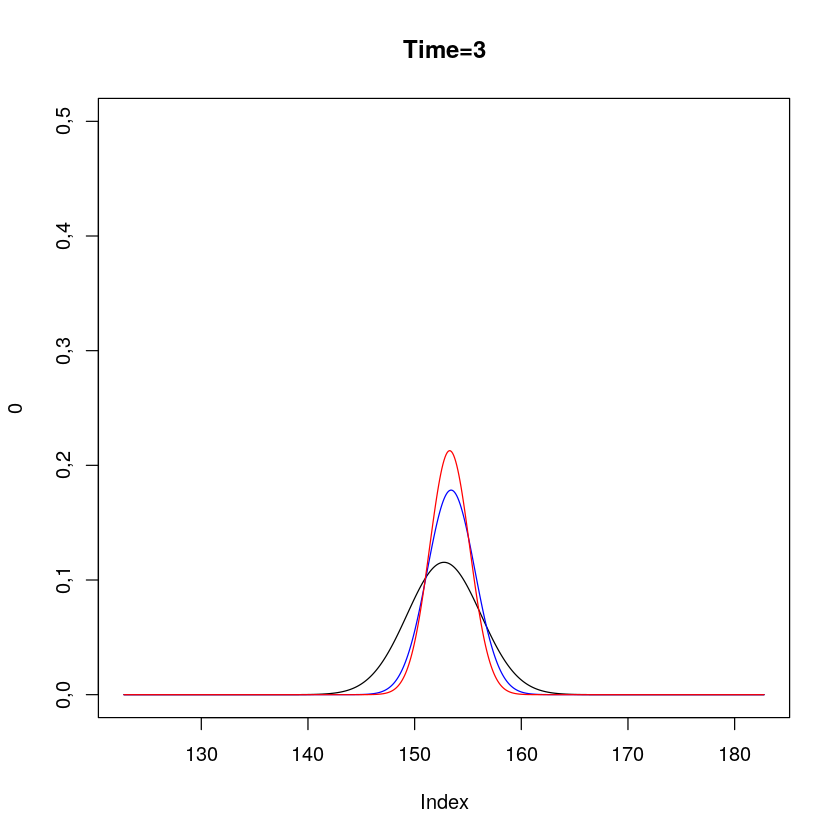

Press [enter] to continue


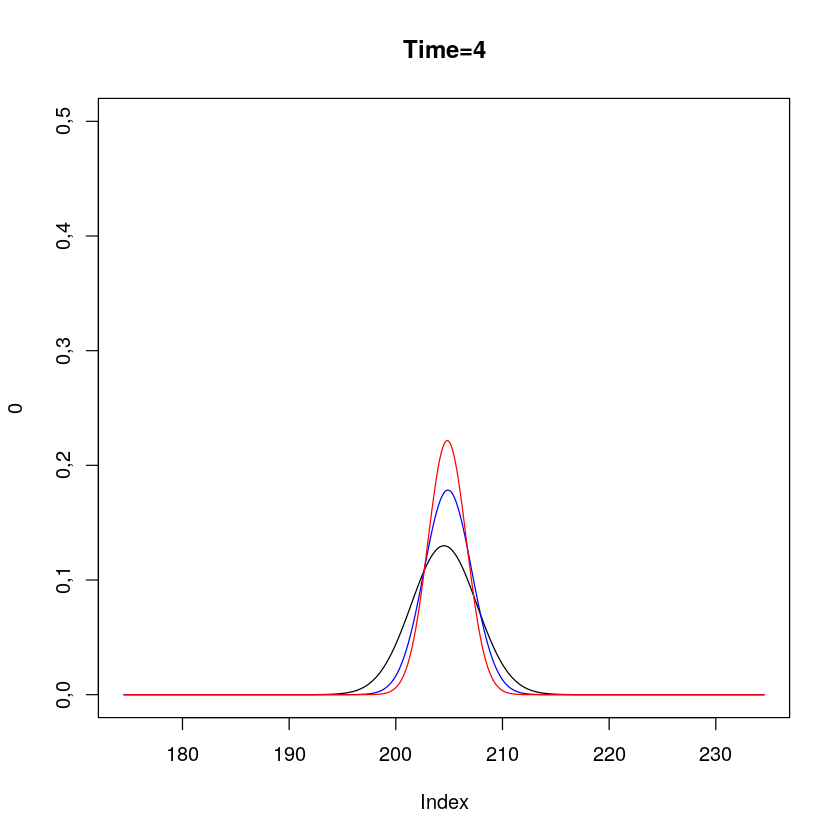

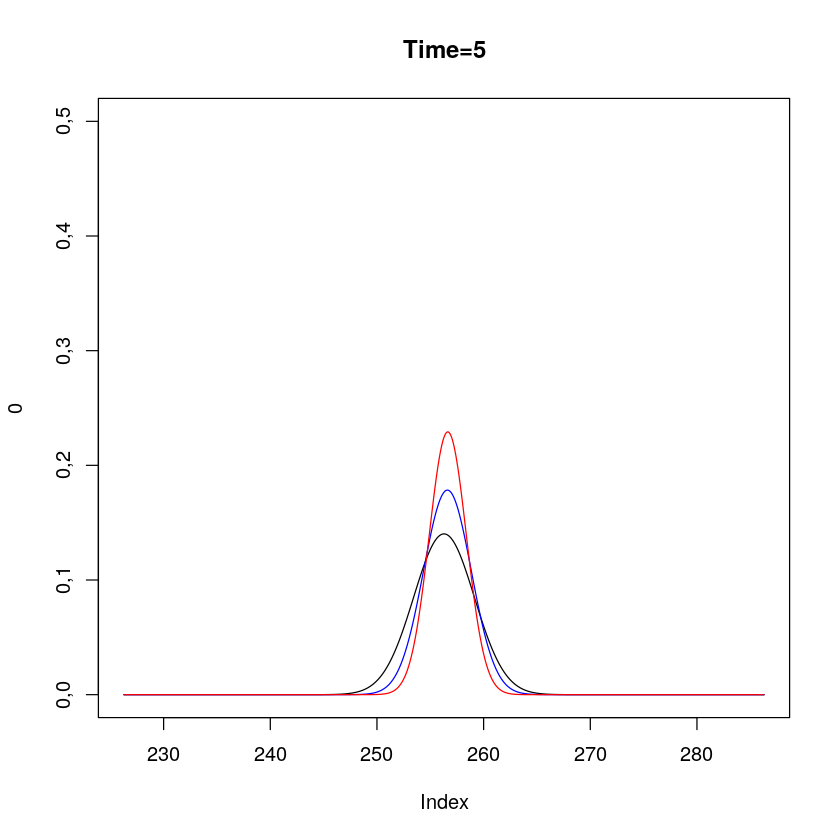

In [4]:
main()